# Introduction to Network Analysis

***Christian Gerloff*** <br><br>
### Get started with the course materials
To interactively work with the materials, you can open this notebook in  [google colab](https://https://colab.research.google.com/). 
<br><br>


## 1 Preparation

### 1.1 Install required packages
Here we install the required packages. <br><br>

In [35]:
!pip -q install networkx scipy seaborn


[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [36]:
import numpy as np
import networkx as nx
import seaborn as sns
import pickle
from pathlib import Path
from IPython.display import Image
from matplotlib import pyplot as plt

PATH_ASSETS = Path().cwd() / "networkworkshop" / "assets"
PATH_DATA = Path().cwd() / "networkworkshop" / "data"


## 2. Networks, sounds good but what is it?

Networks occur in many areas of our lives. We can find them in social networks, the internet, the brain, and many other areas. Networks are a powerful tool to describe and analyze complex systems. In this section, we will introduce the basic concepts of networks.

### 2.1 What is a network?

Networks, formerly termed graphs, are system representations<br><br>

They can be described by two main components:

***nodes***: representing the entities of a graph,<br>
***edges***: describging the "relationships" between the entities in the graph.

Hence, a graph $G$ is defined as a tuple $G = (V, E)$, where V is a set of nodes and $E$ is a set of edges, linking the nodes. <br><br>
One can also describe a graph by its ***adjacency matrix*** $A$, where $A_{ij}$ describes the edge between node $i$ and node $j$. <br><br>

An edge $e$ can be described by binary {0,1} or weighted values $w$ (e.g. $w \in \mathbb{R}$), describing the strength of the relationship between the nodes. <br><br>

 <br><br>
***Q***: For which of your research data could you descibe the data as a network? <br><br>

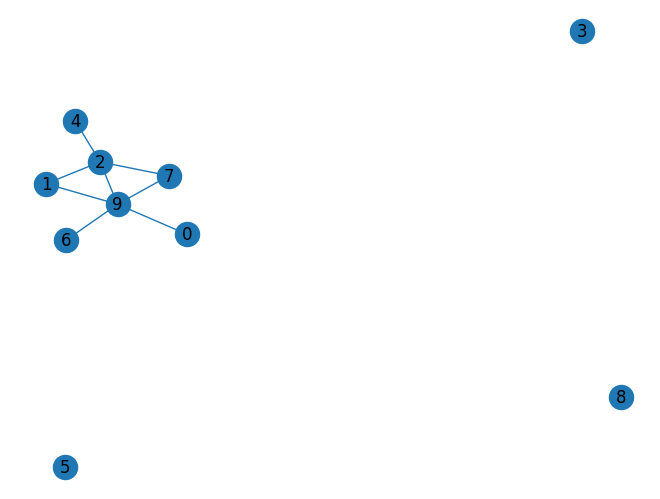

<Axes: >

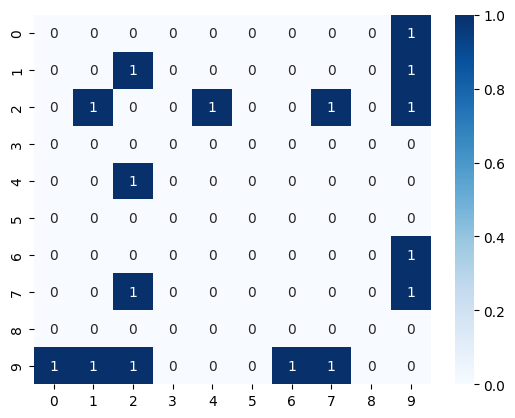

In [37]:
# Here, we generate a random graph
G = nx.erdos_renyi_graph(10, 0.3)
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="#1f78b4", edge_color="#1f78b4")
plt.show()

# The adjacency matrix of the graph is often visualized as a heatmap
A = nx.adjacency_matrix(G).todense()
sns.heatmap(A, annot=True, xticklabels=G.nodes(), yticklabels=G.nodes(), cmap="Blues")

### 2.2 Important networks characteristics

Generally, we could distinguish between: 
* ***directed*** and ***undirected***,
* ***weighted*** and  ***unweighted***,
* ***unipartite*** and ***bipartite***,
* ***fully connected*** and ***weakly connected*** and ***disconnected*** networks,
* ***static*** and ***dynamic*** network analysis. <br><br>

| Type | Description | Interpretation |
| --- | --- | --- |
| Undirected | Edges are not directed, i.e. $A_{ij} = A_{ji}$ (symmetric adjacency matrix) | E.g., can not differenciate who is the sender and who is the receiver / who leads the interaction |
| Directed | Edges are directed, i.e. $A_{ij} \neq A_{ji}$ (asymmetric adjacency matrix) | E.g., can differenciate who is the sender and who is the receiver / who leads the interaction |
| Unweighted | Edges are not weighted, i.e. $A_{ij} \in \{0,1\}$ | E.g., can not differenciate between strong and weak interactions |
| Weighted | Edges are weighted, i.e. $A_{ij} \in \mathbb{R}$ | E.g., can differenciate between strong and weak interactions |
| unipartite | Nodes are not partitioned into groups | E.g., can not differenciate between different groups of nodes |
| "X"partite | Nodes are partitioned into X groups, i.e. $V = \{V_1, V_2, ..., V_n\}$ | E.g., we can differenciate between different groups of nodes |
| fully connected | All nodes are connected to each other | E.g., all nodes are linked |
| weakly connected | All nodes are connected to each other, but not necessarily directly | E.g., we can reach all nodes from each other, but not necessarily directly |
| disconnected | undirected graph disconnected if there exist a node that can not be reached from at least one other node ||
| Static | Static network analysis, i.e. $A$ is constant over time | E.g., can not differenciate between different time points |
| Dynamic | Dynamic network analysis, i.e. $A$ is not constant over time or a set of adjacency matrices | E.g., we aim to assess changes in the system over time |


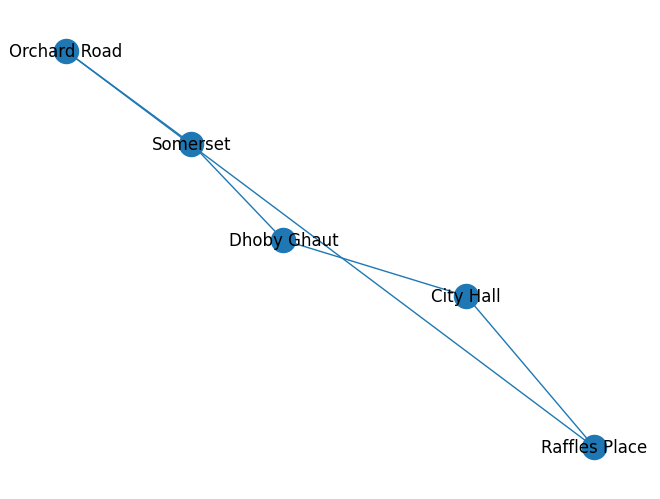

In [38]:
# We specify a set of nodes V
V = [0, 1, 2, 3, 4]

# But here we want to use the names of the MRT stations as node labels
V = {0: "Orchard Road", 1: "Somerset", 2: "Dhoby Ghaut", 3: "City Hall", 4: "Raffles Place"}

# And additionally, we specify the positions of the nodes
mrt_stations = {
    "Orchard Road": {"easting": -329263, "northing": 282260},
    "Somerset": {"easting": -329155, "northing": 282182},
    "Dhoby Ghaut": {"easting": -329076, "northing": 282101},
    "City Hall": {"easting": -328919, "northing": 282054},
    "Raffles Place": {"easting": -328809, "northing": 281927}
}
pos = {v: (mrt_stations[n]["easting"], mrt_stations[n]["northing"]) for v, n in V.items()}
# We specify a set of edges E as a list of tuples (i, j)
E = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 0)]
# We specify the edge weights as a dictionary
weights = {(0, 1): 1, (1, 2): 0, (2, 3): 1, (3, 4): 0, (4, 0): 1}
# We create a graph
G = nx.Graph()
# We add the nodes with labels, otherwise it would be G.add_nodes_from(V)
for node, label in V.items():
    G.add_node(node, label=label)
# We add the edges
G.add_edges_from(E)
# We set the edge weights
nx.set_edge_attributes(G, weights, "weight")
# We set the node labels
labels = nx.get_node_attributes(G, 'label')
# We visualize the graph with node labels
nx.draw(G, pos, labels=labels, with_labels=True, node_color="#1f78b4", edge_color="#1f78b4")


***Q***: Is it necessary to specify the weights of the edges in this case?

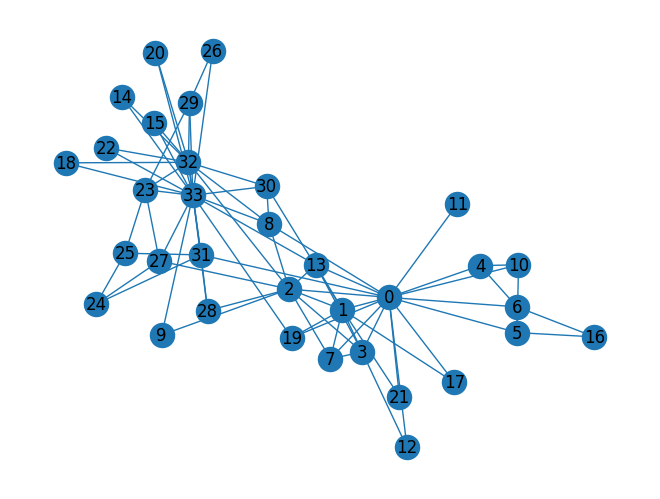

<Axes: >

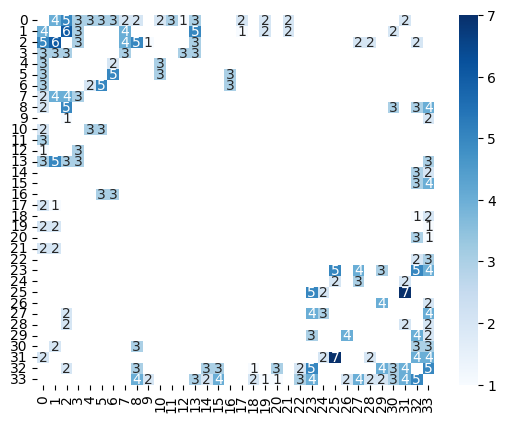

In [39]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="#1f78b4", edge_color="#1f78b4")
plt.show()


A = nx.adjacency_matrix(G).todense()
sns.heatmap(
    A,
    annot=True,
    xticklabels=G.nodes(),
    yticklabels=G.nodes(),
    cmap="Blues",
    mask=(A == 0),
)

***Q***: What type of network is that?

You can also specify the graph based on a adjacency matrix $A$. <br><br>

```# specify the graph based on a adjacency matrix $A$
A = np.array(
    [
        [0, 1, 0, 0, 1],
        [1, 0, 1, 0, 0],
        [0, 1, 0, 1, 0],
        [0, 0, 1, 0, 1],
        [1, 0, 0, 1, 0]
    ]
)
# create the graph
G = nx.from_numpy_matrix(A)
```


### Properties of networks

Networks can be described by different properties. Some graph properties can be obtained for a specific node (nodal property)
and some across the whole graph (global property). <br><br>

#### Nodal degree

The degree of a node $i$ is defined as the number of edges connected to the node $i$. <br><br>
$d_i = \sum_{j=1}^N A_{ij}$ <br><br>

Nodal degree is also used to specify the degree matrix $D$.
The degree matrix $D$ is a diagonal matrix, where $D_{ii} = d_i$. <br><br>

#### Global degree

The global degree of a graph $G$ is defined as the sum of all degrees of the nodes in the graph. <br><br>
$d = \sum_{i=1}^N d_i$ <br><br>

#### Nodal strength

The strength of a node $i$ is defined as the sum of the weights of all edges connected to the node $i$. <br><br>
$s_i = \sum_{j=1}^N A_{ij} w_{ij}$ <br><br>

Sometimes the strength is also standardized, e.g, by the degree of the node $i$.
There are setting where a standardization is crucial <br><br>


#### Degree Centrality
***Neuro / Hyperscanning perspective on this measure***: <br>
important regions facilitating synchronization may have many connections.
This centrality can be expressed by the number of neighbors.

### Betweenness Centrality
***Neuro / Hyperscanning perspective on this measure***: <br>
important regions facilitating synchronization may connect other regions.

FOr a node $i$, the betweenness centrality is defined as the number of shortest paths between all other nodes $j$ that pass through the node $i$. <br><br>

$c_i = \sum_{j \neq i \neq k} \frac{\sigma_{jk}(i)}{\sigma_{jk}}$ <br><br>

where $\sigma_{jk}$ is the number of shortest paths between nodes $j$ and $k$ and $\sigma_{jk}(i)$ is the number of shortest paths between nodes $j$ and $k$ that pass through node $i$. <br><br>
**see also**: https://doi.org/10.1155/2014/241723

### Modularity
compares the number of edges inside a cluster to the expected number of edges in a random graph with the same nodal degree. 
It is used to identify strongly connected subsets, i.e., modules or 'communities', e.g, using the Louvain algorithm <br><br>

The modularity value typically ranges from -1 to 1:

A value close to 1 indicates strong community structure, meaning the network can be clearly divided into groups where there are many within-group edges and only a few between-group edges.
A value around 0 suggests that the network's structure is not very different from a random network, in terms of expected within- and between-group edges.
A negative modularity value would imply that the network connectivity is less modular than expected by chance

### Graph Laplacien
The graph Laplacian is defined as $L = D - A$, where $D$ is the degree matrix and $A$ is the adjacency matrix. <br><br>


The eigenvalues of the Laplacian give insights into the connectivity of the graph. The smallest eigenvalue is always 0, and its multiplicity (the number of times it appears) equals the number of connected components in the graph. A graph is fully connected if and only if there is exactly one zero eigenvalue.

The eigenvectors corresponding to the smallest eigenvalues (especially the second smallest, known as the Fiedler value) can reveal interesting structural properties about the graph, like clusters or "bottlenecks".


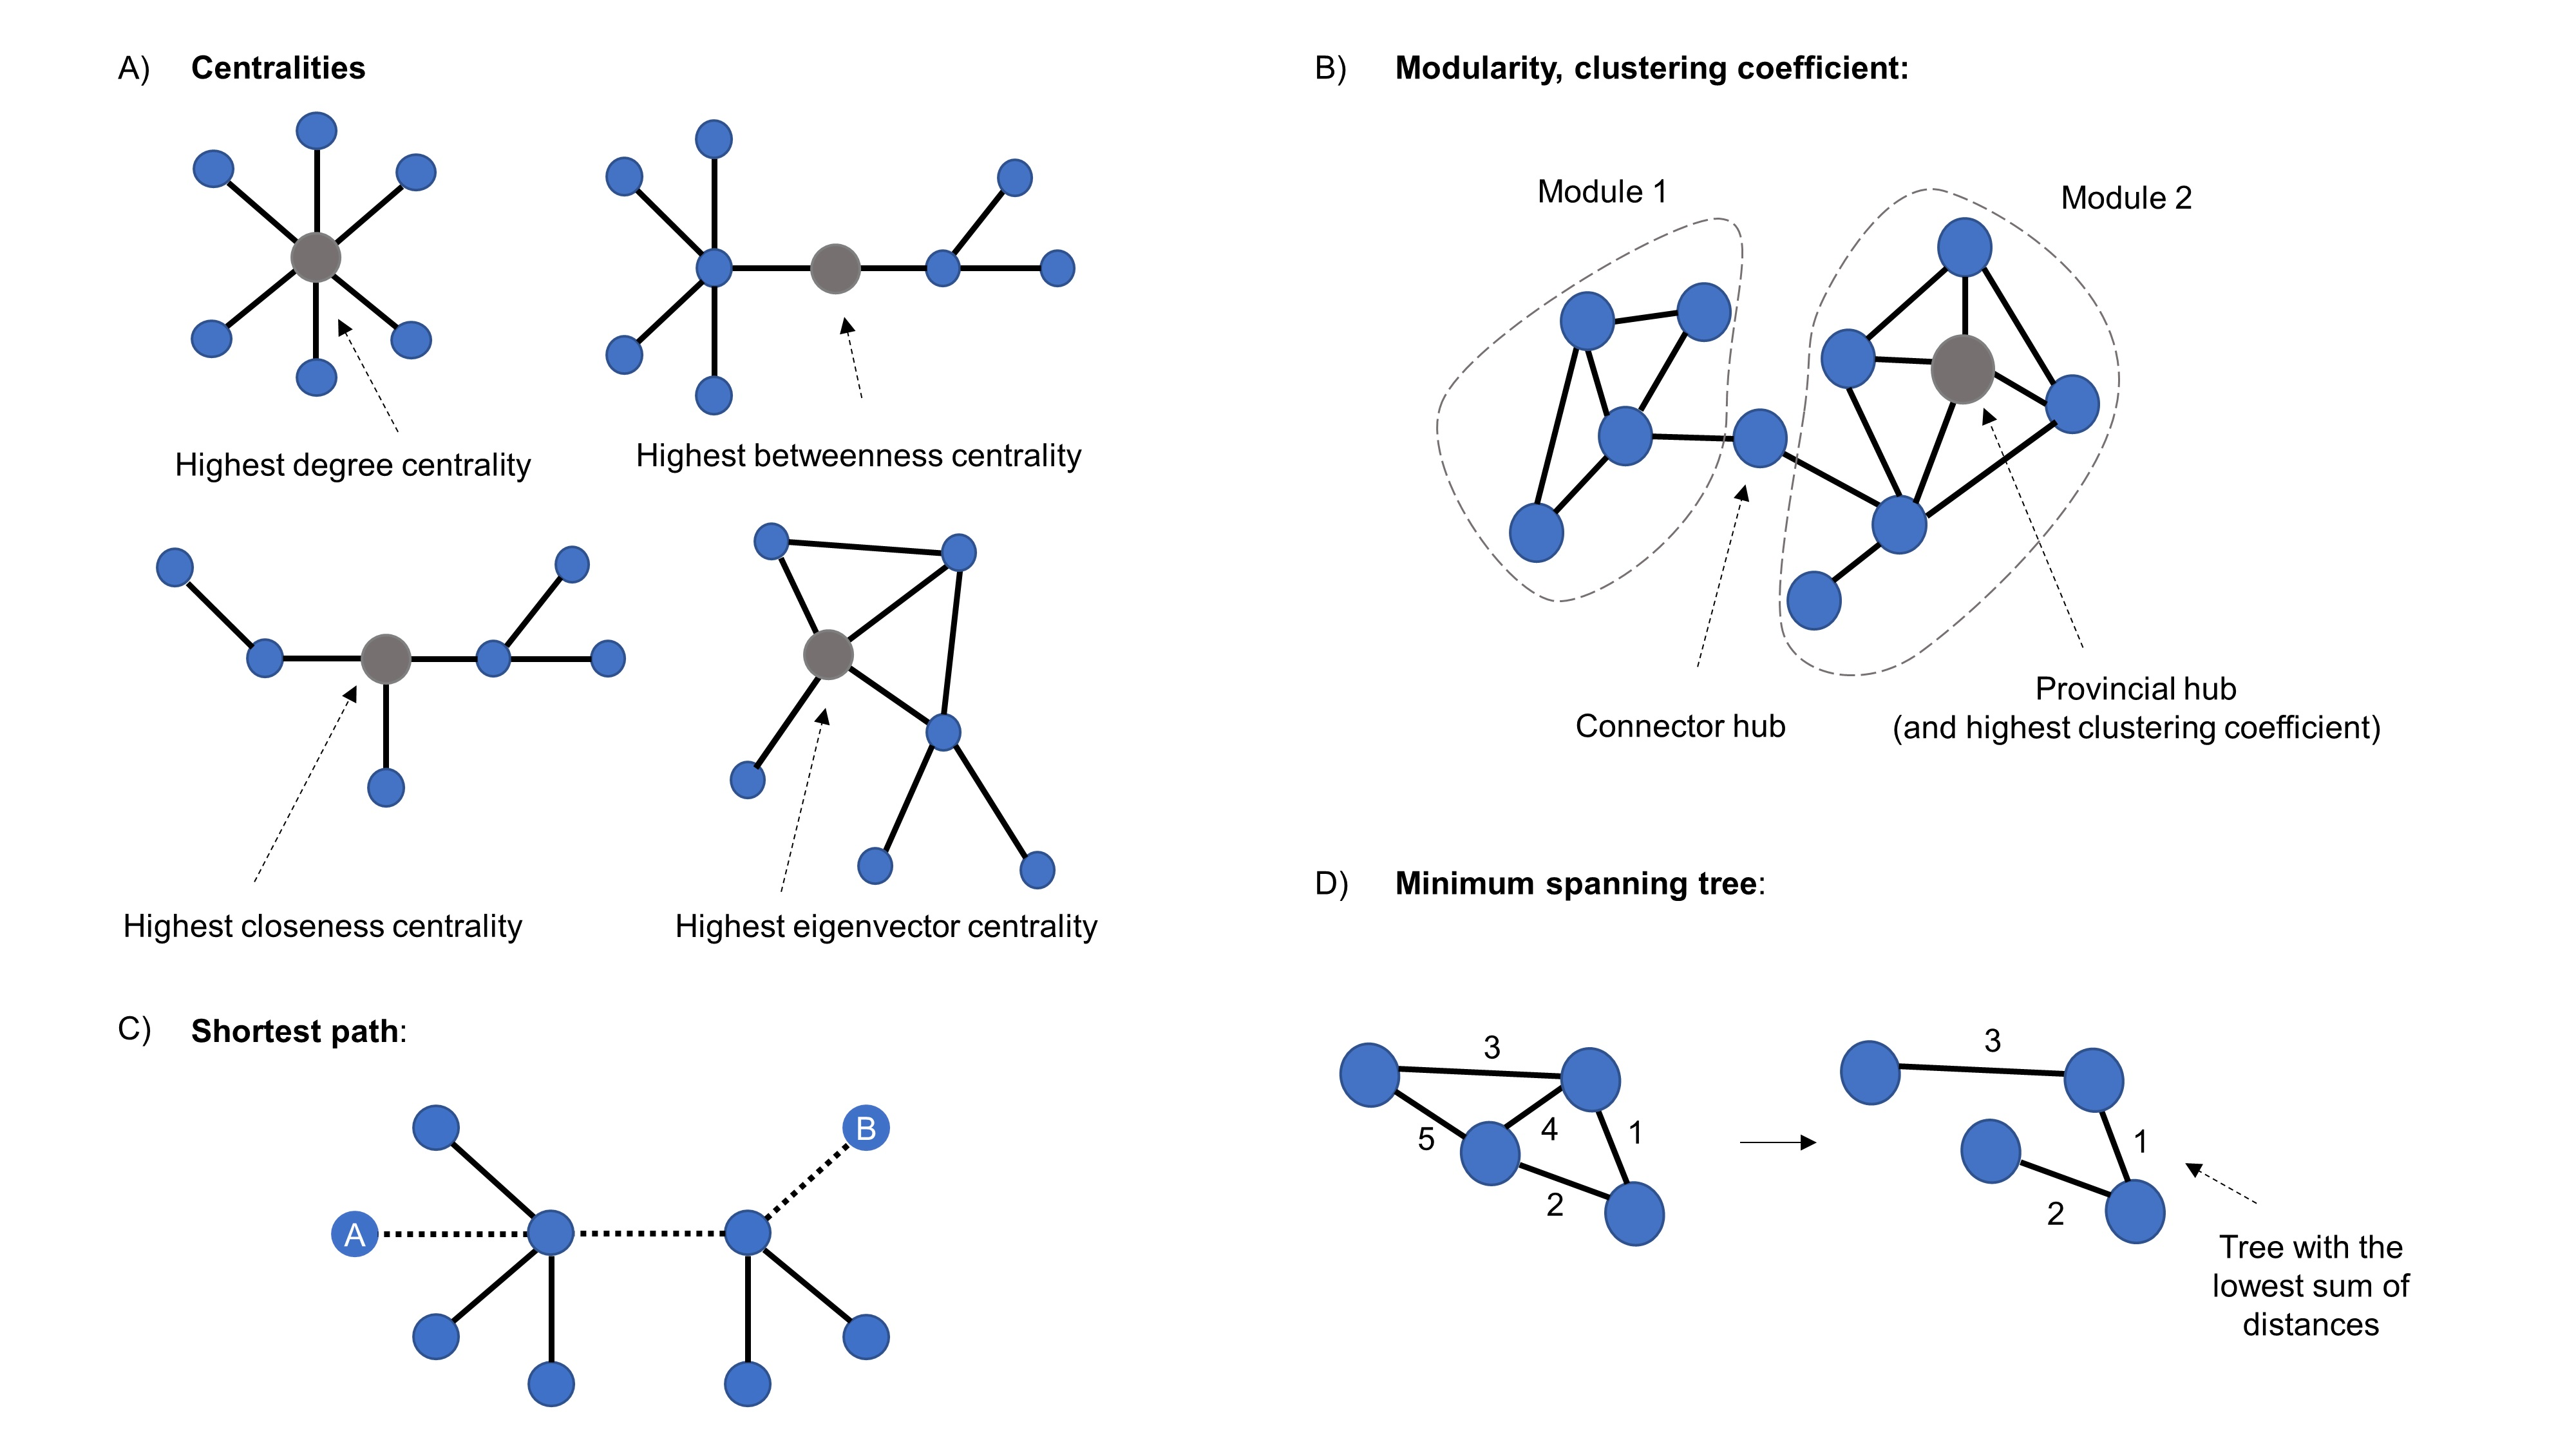

In [40]:
Image(PATH_ASSETS / 'overview.jpg')


from Centento et al. 2022

# 3 Networks for interpersonal neural synchronization

Lets assume that we perform a hyperscanning study, where we measure EEG signals of mother-child dyad in Pz, Cz,, C3, C4, and Fz. <br><br>
Hence, we have 5 channels for each 2 participant.
THe set of all nodes of a dyad would include <br>
$V=\{Pz_{child}, Cz_{child}, C3_{child}, C4_{child}, Fz_{child}, Pz_{mother}, Cz_{mother}, C3_{mother}, C4_{mother}, Fz_{mother}\}$ <br><br>


In this case, we might be interested in the synchronization:
1.  only between brain regions of the two participants (***interbrain*** network, or between-brain network)
2.  only between brain regions within one participant (***intrabrain*** network),
3.  both, between brain regions of the two participants and within each participant (***multibrain*** network).

## 3.1 Interbrain networks

1. To formulate the interbrain network, we can use the full set of nodes $V$ but we partion graph based on the participants in two disjoint sets. That means we partion our set $V$ into two sets $V_{child}$ and $V_{mother}$, where $V_{child}=\{Pz_{child}, Cz_{child}, C3_{child}, C4_{child}, Fz_{child}\}$ and $V_{mother}=\{Pz_{mother}, Cz_{mother}, C3_{mother}, C4_{mother}, Fz_{mother}\}$. <br><br>
2. We consider only the edges between the two sets $V_{child}$ and $V_{mother}$, i.e. $E_{interbrain} = \{e_{ij} \in E | i \in V_{child}, j \in V_{mother}\}$ <br><br>

That means a interbrain network can be specified as: <br> 
$G_{interbrain} = (V_{child} \cup V_{mother}, E_{interbrain})$. <br><br>

Hence, ***interbrain networks are formally bipartite graphs***.

### Main characteristics of bipartite graphs
1. nodes and edges belong to a set (similar to unipartite graphs)<br>
That means the node set contains only unique brain regions / channels and <br>
edge set contains only unique connections between brain regions

2.  edges can only occur between nodes of different partitions
That means edges can only occur between brain regions / channels of different participants


3. Graph properties of bipartite graph can have different meaning or may not be feasable <br><br>


## 3.2 Graph reduction and stratification

Analysis of complete graphs can tend to false-positive effects due to spurious connectivity.
This is often combined with a binarization step of the adjacency matrix $A$. <br><br>

Typical approaches are:
* absolute thresholding of edges (e.g. only consider edges with a weight above a certain threshold)
* proportional thresholding of edges (e.g. only consider the top X% (e.g, 25%) of edges with the highest weights)
* statistical approaches

Here, we do not elaborate on the details of the procedure, but see [![DOI: 10.1002/hbm.25966](https://img.shields.io/badge/DOI-10.1002%2Fhbm.25966-blue)](https://doi.org/10.1002/hbm.25966) for more information. <br><br>

#### Network stratification for interaction related data

For networks including dyadic or group based data we proposed a graph reduction procedure based on ***blockwise permutation*** of signals from ***non-interaction partners (shuffled / random pairs)***. This procedure draws on the conceptual design of hyperscannig as it provides a natural control for non-interaction related neural synchrony and allows to stratify for confounds already during the graph construction. By defining the exchangables, a stratification for experiment-specific confounds is enabled.

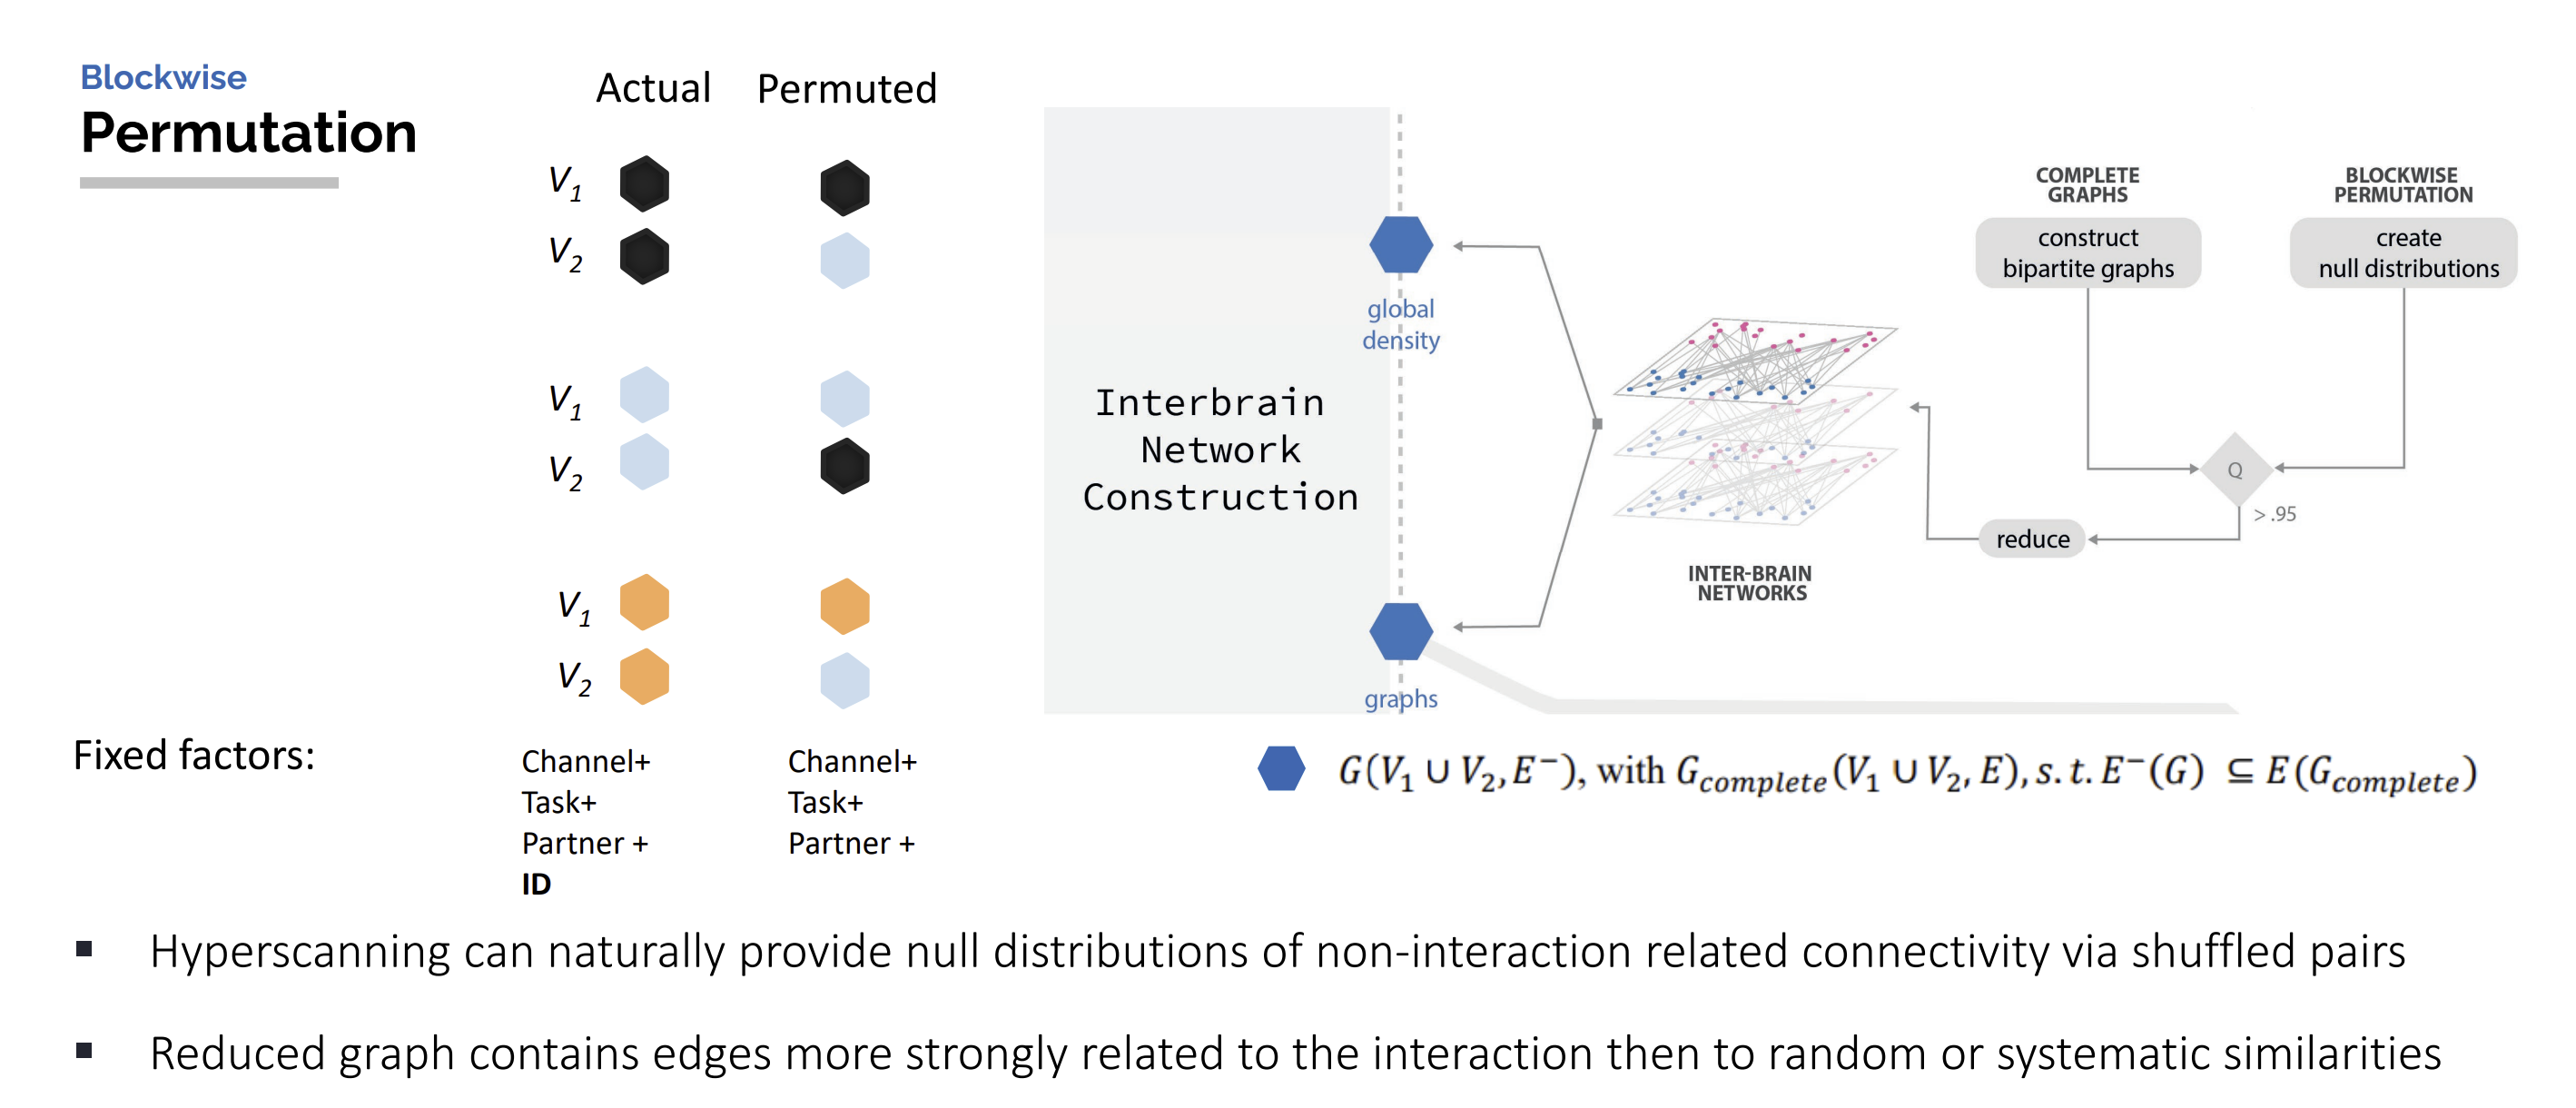

In [41]:
Image(PATH_ASSETS / 'graph_reduction.png')

from Gerloff et al. 2022

## 3.3 Example analysis (static)

In this example we will analyse a static graph. Based on the wPLI.

### 3.3.1 Load data

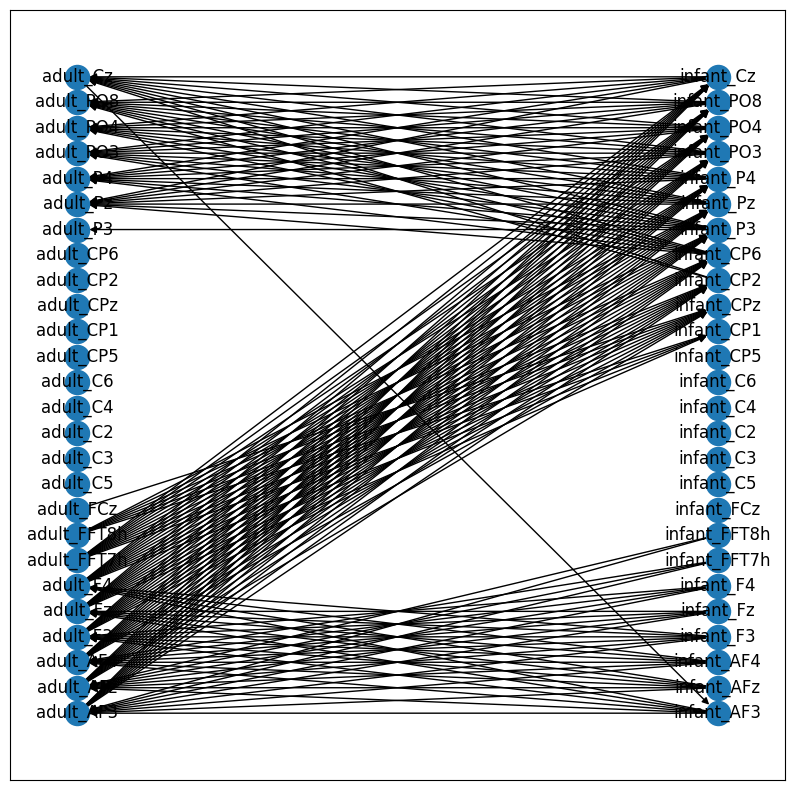

In [44]:
# load data
with open(PATH_DATA / "input" / "node_labels.pkl", "rb") as handle:
    node_labels = pickle.load(handle)
with open(PATH_DATA / "input" / "pos.pkl", "rb") as handle:
    pos = pickle.load(handle)
with open(PATH_DATA / "input" / "network_snapshots.pkl", "rb") as handle:
    snapshots = pickle.load(handle)
static_graph = snapshots[3]
with open(PATH_DATA / "input" / "multilayer_network.pkl", "rb") as handle:
    multilayer_network = pickle.load(handle)

plt.figure(figsize=(10, 10))
nx.draw_networkx(
    static_graph,
    pos=pos,
    labels=node_labels,
    arrows=True,
    with_labels=True
)

<Axes: >

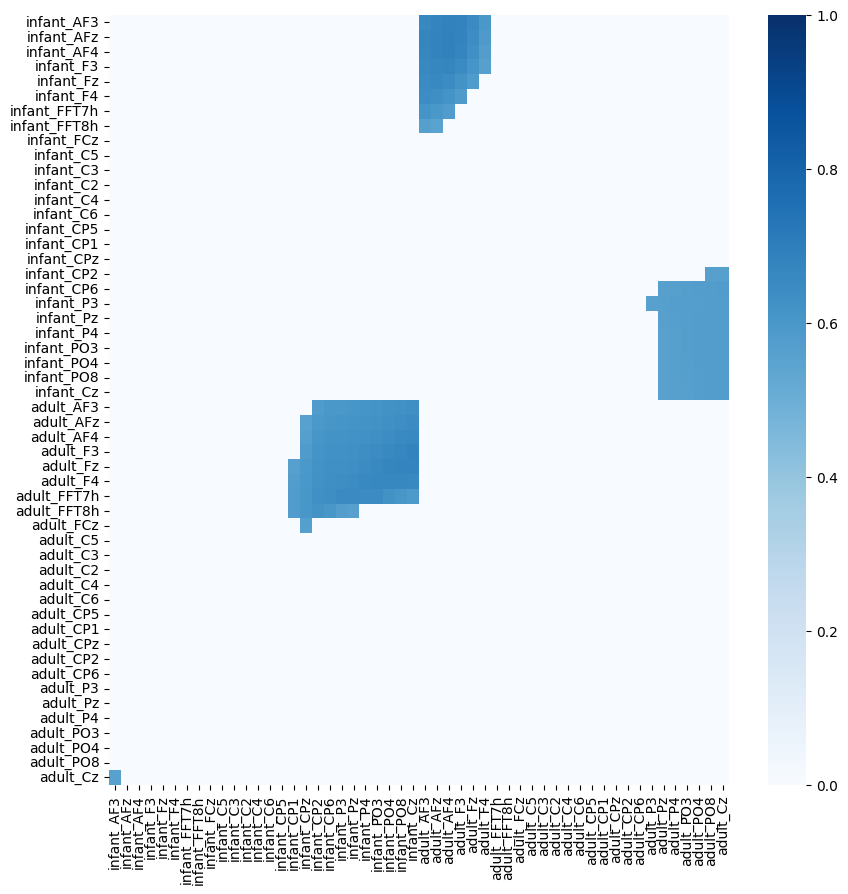

In [45]:
# plot adjacency matrix
A = nx.adjacency_matrix(static_graph).todense()
plt.figure(figsize=(10, 10))

sns.heatmap(
    A,
    annot=False,
    xticklabels=node_labels.values(),
    yticklabels=node_labels.values(),
    cmap="Blues",
    vmin=0,
    vmax=1
)

### 3.3.2 Graph properties

#### Degree distribution
The plot shos that the interbrain netowrk has a degree distribution that has a heavy tail (a few nodes with very high degree). This is a typical property of real-world networks. However, this property should be tested basd against a random graph with appropriate charactersitcs, see [![DOI: 10.1002/hbm.25966](https://img.shields.io/badge/DOI-10.1002%2Fhbm.25966-blue)](https://doi.org/10.1002/hbm.25966).

/tmp/ipykernel_388/50275006.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(list(degs.values()), kde=False, bins=range(0, 20))


Text(0, 0.5, 'Counts')

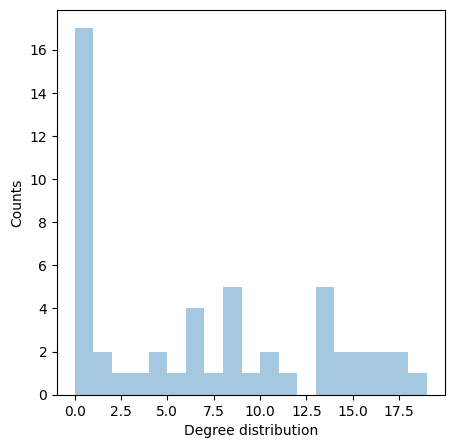

In [46]:

# convert DiDegreeView to networkx.Graph
degs = dict(nx.degree(static_graph))

# vizualize degree distribution dict via a histrogram
plt.figure(figsize=(5, 5))
sns.distplot(list(degs.values()), kde=False, bins=range(0, 20))
plt.xlabel('Degree distribution')
plt.ylabel('Counts')

#### Strength Values ( intensity of interactions )
The plot suggests variability in how nodes in the network are connected, with some nodes having stronger connections than others.
There are no extremely high bars towards the right end of the histogram, suggesting there are not many nodes with a very high normalized strength. This could mean the network does not have nodes that are overwhelmingly more connected 

/tmp/ipykernel_388/2401182835.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(normstrengthlist, kde=False, bins=20)


Text(0, 0.5, 'Counts')

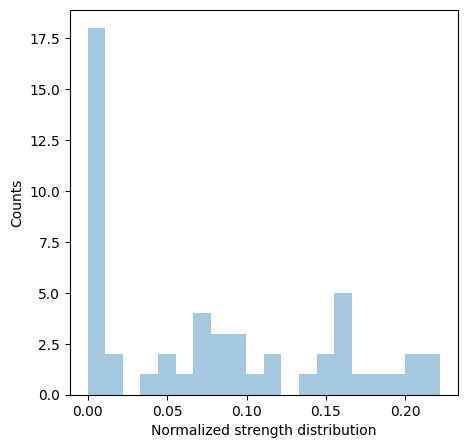

In [47]:
strength = static_graph.degree(weight='weight')
strengths = {node: val for (node, val) in strength}
nx.set_node_attributes(static_graph, dict(strength), 'strength')

# Normalized node strength
normstrenghts = {node: val * 1/(len(static_graph.nodes)-1) for (node, val) in strength}
nx.set_node_attributes(static_graph, normstrenghts, 'strengthnorm')
normstrengthlist = np.array([val * 1/(len(static_graph.nodes)-1) for (node, val) in strength])

# Plot normstrngtlist 
plt.figure(figsize=(5, 5))
sns.distplot(normstrengthlist, kde=False, bins=20)
plt.xlabel('Normalized strength distribution')
plt.ylabel('Counts')

#### High Frequency of Low Betweenness Centrality Values:
The high bars on the left side of the histogram indicate that there are many nodes with low betweenness centrality values, close to 0. This suggests that most nodes do not often lie on the shortest paths between other pairs of nodes. This might be expected for interbrain networks, as the nodes are not directly connected to each other, but rather connected through regions of the other participant.

#### Few Nodes with High Betweenness Centrality Values:
There are very few nodes that have higher betweenness centrality values (as seen by the bars on the right side of the histogram). These nodes may have strategic positions within the network, potentially acting as critical connectors or 'bridges' between different parts of the graph.

#### Moderate modularity value:
A value ~0.2 means there are more connections within groups than would be expected if the edges were distributed randomly, but the division is not entirely clear.

Modularity value in this range, it's possible that some nodes may serve as bridges between communities, or that some communities may share many nodes.


***Note***: Here, we provide a standard approach applicable to most networks. However, their are caveates for bipartite graphs.

/tmp/ipykernel_388/3342632365.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(list(betweenness.values()), kde=False, norm_hist=False)


Text(0, 0.5, 'Counts')

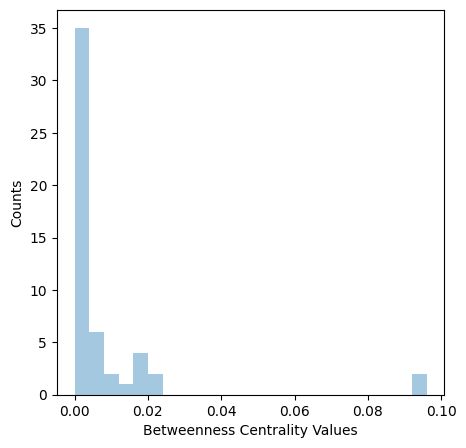

In [48]:
betweenness = nx.betweenness_centrality(static_graph, weight='distance', normalized=True) 
nx.set_node_attributes(static_graph, betweenness, 'bc')

plt.figure(figsize=(5, 5))
sns.distplot(list(betweenness.values()), kde=False, norm_hist=False)
plt.xlabel('Betweenness Centrality Values')
plt.ylabel('Counts')

In [49]:
partition = nx.community.louvain_communities(static_graph, weight='weight')
modularity = nx.community.modularity(static_graph, partition, weight='weight')
print(f'N partitions: {len(partition)}'
      f'\nModularity: {modularity}')


N partitions: 20
Modularity: 0.22549423020790493


# 4. A heuristical approach to network flexibility (dynamic networks)


### 4.1 Neural flexibility
The measures how a neural network reconfigures its connectivity patterns over time.
Therefore a community detection is applied on multilayer networks to quantify how often a node changes its community assignment over time.


### 4.2 Multiplex networks
Earlyer, we loaded a list of graphs, where each graph represents a network at a specific time point, also termed snapshots.
These snapshots can be used to formulate multilayer networks, where each layer represents a snapshot. <br><br>

Here, we consider a weighted, undirected network

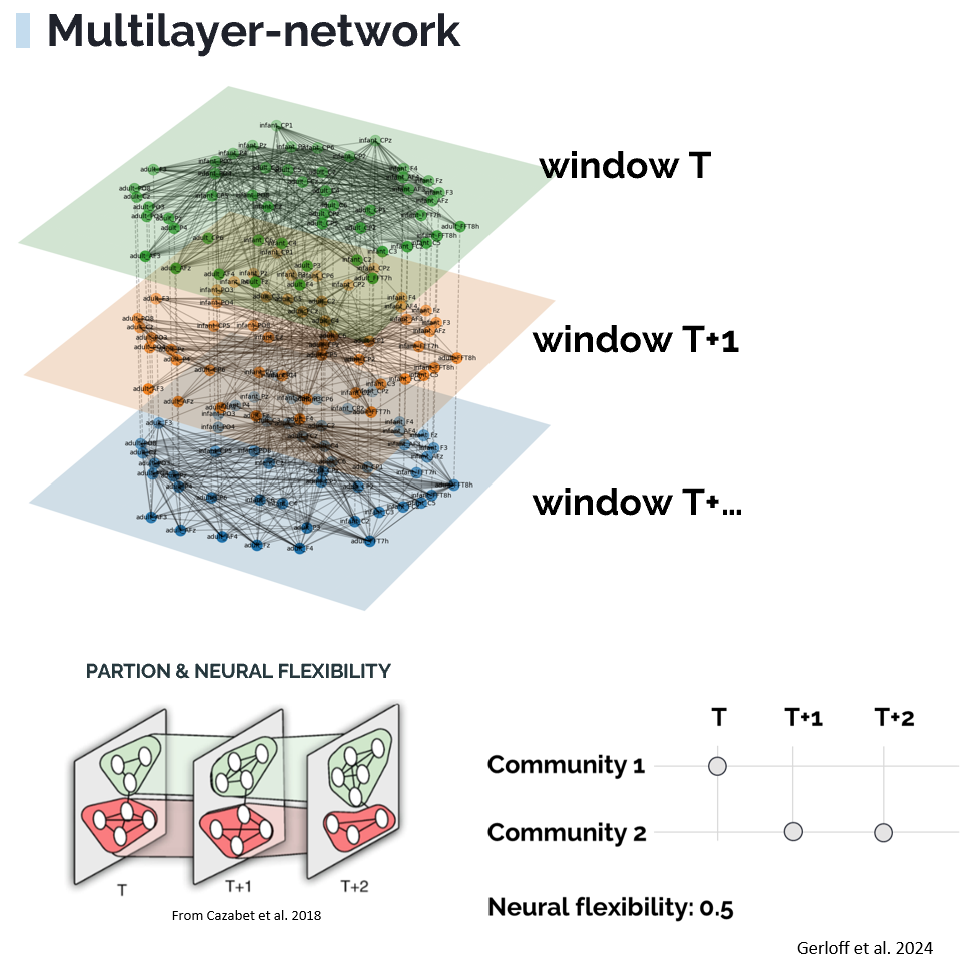

In [51]:
Image(PATH_ASSETS / 'multilayer.png')

([], [])

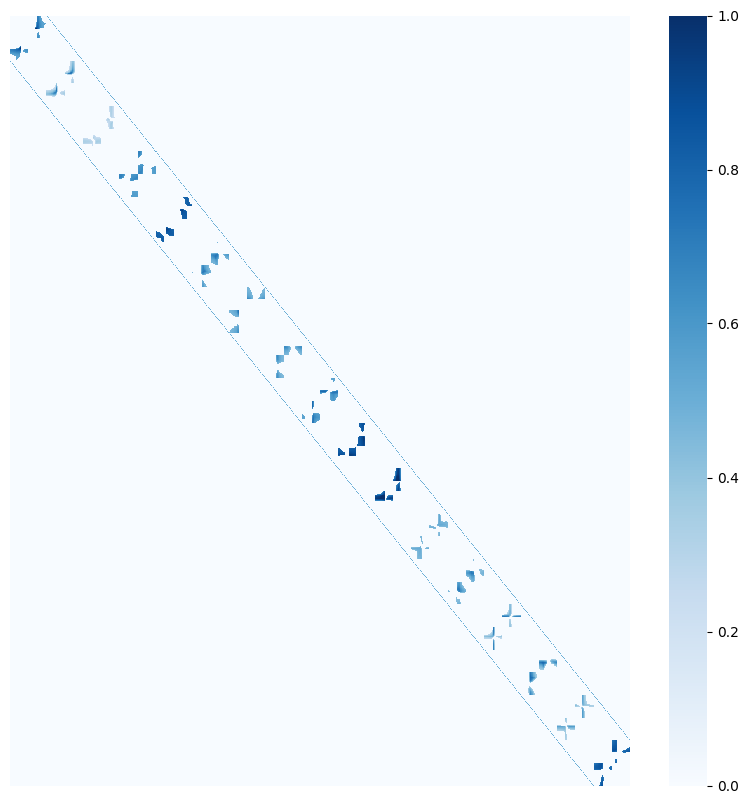

In [52]:
# plot adjacency matrix
A = nx.adjacency_matrix(multilayer_network).todense()
plt.figure(figsize=(10, 10))
sns.heatmap(
    A,
    annot=False,
    cmap="Blues",
    vmin=0,
    vmax=1
)
# delete x and y ticks
plt.xticks([])
plt.yticks([])


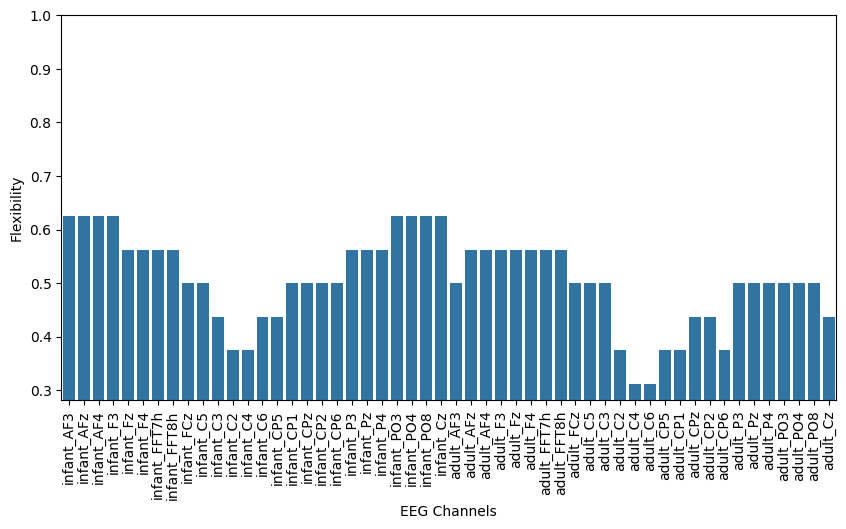

In [54]:
partition = nx.community.louvain_communities(multilayer_network, weight='weight')

community_map = {}
for i, community in enumerate(partition):
    for node in community:
        original_node = multilayer_network.nodes[node]['original_node']
        layer = multilayer_network.nodes[node]['layer']
        community_map.setdefault(original_node, {}).update({layer: i})

# Calculate nodal flexibility
flexibility = {}
for node, layers in community_map.items():
    changes = sum(1 for i in range(1, len(layers)) if layers[i] != layers[i + 1])
    max_changes = len(layers) - 1
    flexibility[node] = changes / max_changes if max_changes > 0 else 0

# map node_labels to flexibility
flexibility = {val: flexibility.get(node) for (node, val) in node_labels.items()}

plt.figure(figsize=(10, 5))
sns.barplot(flexibility)
plt.ylim(min(flexibility.values())*0.9, 1)
plt.xticks(rotation=90)
plt.xlabel('EEG Channels')
plt.ylabel('Flexibility')
plt.show()



# Note
Here we performed a basic community detection. In our recent work, we improve this approach for a more precise and information-rich neural flexibility measure. However, this notebook shows the basic concepts for start into network analysis and complex system analysis <br><br>    